**SalesHero | Descriptive Analysis**

This is an analysis that answers a few business questions about a fictional B2B SaaS company called SalesHero that sells a software to help salespersons do their job. SalesHero has two categories of products, namely A and B, and it sells Admin License and SalesRep License with different functionalities. The questions asked are;

*Q1. What is the onboarding trends and makeup of SalesHero customer base (i.e. the business sectors that are buying the software). Is the customer base shifting over time?*

*Q2. Which customers are most utilizing the licenses they bought and is there anything common amongst them?*

*Q3. The end-users of which customers are most and least engaged?*

*Q4. Which are the most and least used features?*

**[CLICK HERE](https://docs.google.com/document/d/1I6E3bMgj6BGAQpzhFngmqN-LUCoyR0daSOzAFeAXSSs/edit?usp=sharing) to see the final report with conclusions.**

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Fetching Datasets

company_df = pd.read_excel(io = "Assignment Data Values.xlsx", sheet_name = 'Company')

usage_df = pd.read_excel(io = "Assignment Data Values.xlsx", sheet_name = 'Company Usage')

courses_df = pd.read_excel(io = "Assignment Data Values.xlsx", sheet_name = 'Courses')

display(company_df.info(), usage_df.info(), courses_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   company_id                327 non-null    int64         
 1   company_category          327 non-null    object        
 2   industry                  327 non-null    object        
 3   sr_lic                    327 non-null    int64         
 4   admin_lic                 327 non-null    int64         
 5   first_customer_sign_date  327 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 15.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3924 entries, 0 to 3923
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3924 non-null   int64  
 1   company_id              3924 non-null   int64  
 2   month 

None

None

None

**Q1. What is the onboarding trend and mix of customer profiles in SalesHero base and is it shifting over time?**

company_category,first_customer_sign_year,A,B
0,2013,1,0
1,2014,1,0
2,2015,5,2
3,2016,6,7
4,2017,19,6
5,2018,17,10
6,2019,21,13
7,2020,25,29
8,2021,33,38
9,2022,22,54


[Text(0.5, 1.0, 'Yearly Onboardings by Company Category'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Onboardings')]

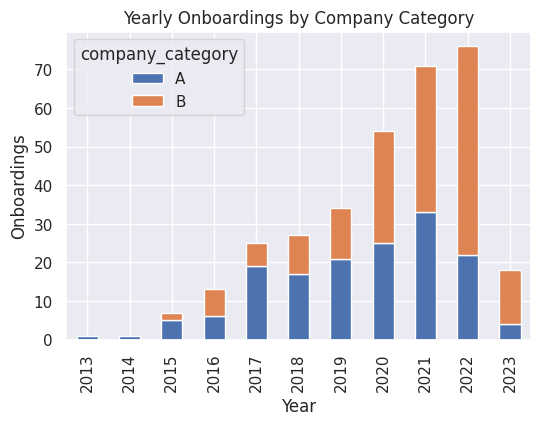

In [ ]:
# Get starting year for each company_id
company_df['first_customer_sign_year'] = company_df['first_customer_sign_date'].dt.strftime('%Y').astype(int)

# Get the yearly onboarding counts for each comapny category and display in a chart
sns.set(rc={'figure.figsize':(6,4)})
display(pd.pivot_table(data = company_df, index = ['first_customer_sign_year'], columns = ['company_category'], values = 'company_id', aggfunc = 'count', fill_value = 0
                      ).reset_index()
        ,pd.pivot_table(data = company_df, index = ['first_customer_sign_year'], columns = ['company_category'], values = 'company_id', aggfunc = 'count'
                      ).reset_index().plot(x = 'first_customer_sign_year', kind = 'bar', stacked = True).set(title = 'Yearly Onboardings by Company Category', xlabel = 'Year', ylabel = 'Onboardings')
        )


first_customer_sign_year,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
industry,,,,,,,,,,,
Agriculture & Forestry,0,0,0,0,0,1,0,0,0,0,0
Automobile,0,0,0,0,0,0,0,0,1,0,0
Automotive,0,0,0,0,0,0,0,0,1,0,0
CPG,0,0,0,0,0,4,1,2,0,0,0
Communications,0,0,0,1,1,2,2,2,3,5,1
Education & Training,0,0,0,0,1,0,1,1,6,2,1
Finance,0,0,1,1,1,5,2,3,6,6,1
Healthcare,0,0,0,1,4,4,10,5,7,6,3
Information Technology and Services,1,1,6,8,17,4,11,30,35,50,12


[Text(0.5, 1.0, 'Companies Onboarded - Yearly Trend'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Companies Onboarded')]

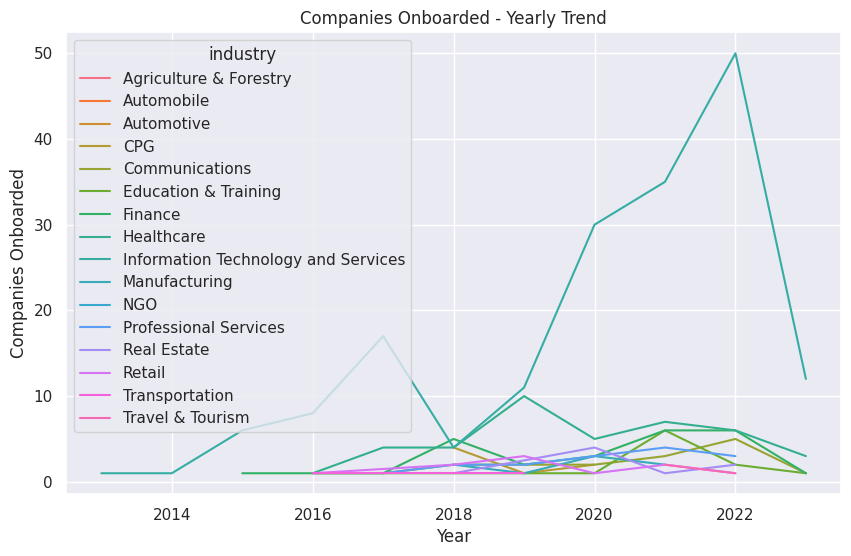

In [ ]:
# Get the yearly onboarding counts for each comapny category and display in a chart
sns.set(rc={'figure.figsize':(10,6)})

line_df = company_df.groupby(['industry','first_customer_sign_year'])[['company_id']].count().reset_index()
ax = sns.lineplot(x='first_customer_sign_year', y='company_id', data=line_df, hue='industry').set(title = 'Companies Onboarded - Yearly Trend',xlabel = 'Year', ylabel = 'Companies Onboarded')

display(pd.pivot_table(data = company_df, index = ['industry'], columns = ['first_customer_sign_year'], values = 'company_id', aggfunc = 'count', fill_value = 0)
       ,ax
        )


,company_category,admin_lic
0,A,50360
1,B,2273


[Text(0.5, 1.0, 'Admin Licenses by Company Category'),
 Text(0.5, 0, 'Company Category'),
 Text(0, 0.5, 'Admin Licenses Bought')]

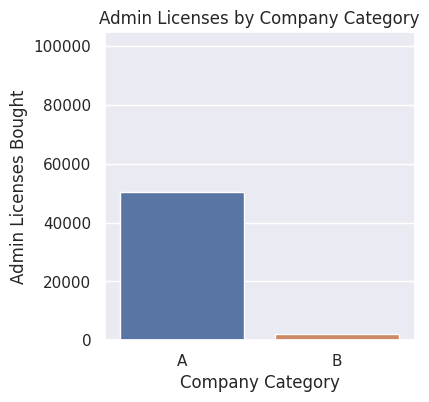

In [ ]:
# Get Category-wise Admin License sold
sns.set(rc={'figure.figsize':(4,4)})

ax = sns.barplot(data = company_df, x = 'company_category', y = 'admin_lic', errwidth = 0, estimator = sum).set(title = 'Admin Licenses by Company Category', xlabel = 'Company Category', ylabel = 'Admin Licenses Bought')

display(company_df.groupby('company_category')[['admin_lic']].sum().reset_index(), ax)


,company_category,sr_lic
0,A,1254727
1,B,46881


[Text(0.5, 1.0, 'Sales_Rep Licenses by Company Category'),
 Text(0.5, 0, 'Company Category'),
 Text(0, 0.5, 'Sales_Rep Licenses Bought')]

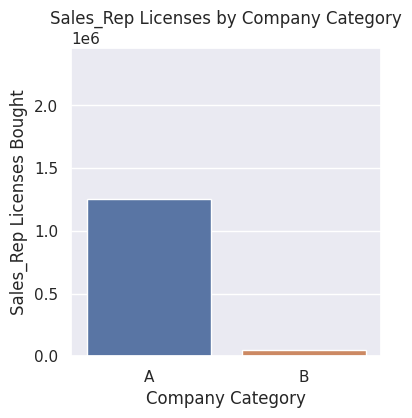

In [ ]:
# Category-wise Sales_Rep License sold
sns.set(rc={'figure.figsize':(4,4)})

ax = sns.barplot(data = company_df, x = 'company_category', y = 'sr_lic', errwidth = 0, estimator = sum).set(title = 'Sales_Rep Licenses by Company Category', xlabel = 'Company Category', ylabel = 'Sales_Rep Licenses Bought')

display(company_df.groupby('company_category')[['sr_lic']].sum().reset_index(), ax)


In [ ]:
# Industry-wise Admin and Sales_Rep Licenses sold

company_df.groupby('industry')[['admin_lic','sr_lic']].sum().sort_values('sr_lic', ascending = False)


,admin_lic,sr_lic
industry,,
Information Technology and Services,33785,812334
Healthcare,9654,243434
Retail,2503,78342
Finance,2562,56565
Communications,1355,43597
CPG,993,23308
Manufacturing,886,21096
Professional Services,387,9457
Transportation,195,7000


**Q2. Which customers are most utilizing the licenses they bought and is there anything common amongst them?**

In [ ]:
#For each company, getting per month active users per license.
merged_df = usage_df.merge(company_df, how = 'left', on = 'company_id')

merged_df = merged_df[['company_id','company_category','industry','first_customer_sign_year','month','sr_active_users','sr_lic','admin_active_users','admin_lic']]

merged_df['active_sr_per_lic'] = merged_df['sr_active_users']/merged_df['sr_lic']

merged_df['active_admin_per_lic'] = merged_df['admin_active_users']/merged_df['admin_lic']

merged_df['active_users_per_lic'] = (merged_df['admin_active_users']+merged_df['sr_active_users'])/(merged_df['admin_lic']+merged_df['sr_lic'])


# creating a dataframe to show company-wise active users per license per month

utility_df = merged_df.groupby(['company_id','industry','company_category','first_customer_sign_year'])[['active_sr_per_lic']].mean().reset_index()

utility_df = utility_df.merge(merged_df.groupby(['company_id'])[['active_admin_per_lic']].mean().reset_index(), how = 'left', on = 'company_id')

utility_df = utility_df.merge(merged_df.groupby(['company_id'])[['active_users_per_lic']].mean().reset_index(), how = 'left', on = 'company_id')


,company_id,active_admin_per_lic
56,57,9.018519
14,15,3.166667
175,176,2.607143
251,252,2.250000
202,203,2.145833


[Text(0.5, 1.0, 'Active Admins per Licenses per Month'),
 Text(0.5, 0, 'Company_ID'),
 Text(0, 0.5, 'Active Admin per License')]

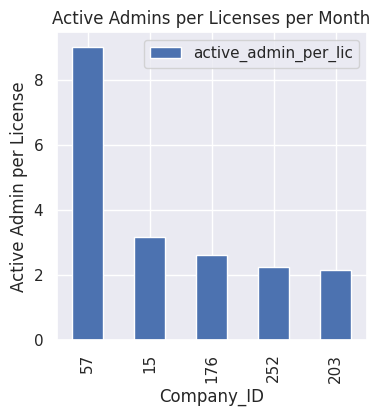

In [ ]:
# Bar Plot for Top 5 Active Admins per License per Month
display(utility_df.sort_values('active_admin_per_lic', ascending = False).head(5)[['company_id','active_admin_per_lic']]
        ,utility_df.sort_values('active_admin_per_lic', ascending = False).head(5)[['company_id','active_admin_per_lic']].plot(x = 'company_id', kind = 'bar').set(title = 'Active Admins per Licenses per Month', xlabel = 'Company_ID', ylabel = 'Active Admin per License')
        )


,company_id,active_sr_per_lic
7,8,5.966354
227,228,2.347222
218,219,1.746000
14,15,1.556833
35,36,1.329560


[Text(0.5, 1.0, 'Active Sales_Rep per Licenses per Month'),
 Text(0.5, 0, 'Company_ID'),
 Text(0, 0.5, 'Active Sales_Rep per License')]

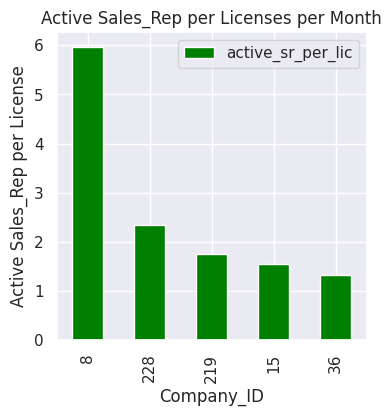

In [ ]:
# Bar Plot for Top 5 Active Admins per License per Month & Top 5 Active Sales_Rep per License per Month
display(utility_df.sort_values('active_sr_per_lic', ascending = False).head(5)[['company_id','active_sr_per_lic']]
        ,utility_df.sort_values('active_sr_per_lic', ascending = False).head(5)[['company_id','active_sr_per_lic']].plot(x = 'company_id', kind = 'bar', color = 'green').set(title = 'Active Sales_Rep per Licenses per Month', xlabel = 'Company_ID', ylabel = 'Active Sales_Rep per License')
        )


**Q3. The end-users of which customers are most and least engaged?**

In [ ]:
# Merging usage and company data to get the onboarding year
merged_df = usage_df.merge(company_df[['company_id','company_category','industry','first_customer_sign_year']], how = 'left', on = 'company_id')

# Aggregating course start and completion numbers
pivot_df = pd.pivot_table(merged_df, index = ['company_id','first_customer_sign_year','company_category','industry'], values = ['invites','starts','completions'], aggfunc = 'sum').reset_index()

# Calculating compeletion rate
pivot_df['completion_rate'] = (pivot_df.completions/pivot_df.starts)

# Calculating standard error for compeletion rate
pivot_df['standard_error_completetion_rate'] = (((pivot_df.completion_rate*(1-pivot_df.completion_rate))/pivot_df.starts).apply(np.sqrt))*2.262

# Calculating upper bound for compeletion rate
pivot_df['upper_bound'] = pivot_df.completion_rate + ((((pivot_df.completion_rate*(1-pivot_df.completion_rate))/pivot_df.starts).apply(np.sqrt))*2.262)

# Calculating lower bound for compeletion rate
pivot_df['lower_bound'] = pivot_df.completion_rate - ((((pivot_df.completion_rate*(1-pivot_df.completion_rate))/pivot_df.starts).apply(np.sqrt))*2.262)


In [ ]:
# Getting the top 5 and bottom 5 companies based on completion rate

columns_to_get = ['company_id','company_category','industry','completion_rate','upper_bound','lower_bound']

display("Top 5 Engaged Companies"
    ,pivot_df[pivot_df.starts>=50].sort_values('completion_rate', ascending = False).head(5)[columns_to_get]
    ,"Bottom 5 Engaged Companies"
    ,pivot_df[pivot_df.starts>=50].sort_values('completion_rate', ascending = True).head(5)[columns_to_get]
)

'Top 5 Engaged Companies'

,company_id,company_category,industry,completion_rate,upper_bound,lower_bound
170,171,A,Transportation,0.996265,0.996934,0.995596
252,253,A,Healthcare,0.993410,0.996508,0.990312
195,196,A,Retail,0.993129,0.993664,0.992595
258,259,B,CPG,0.992134,0.998400,0.985868
267,268,B,Finance,0.990523,0.994790,0.986256


'Bottom 5 Engaged Companies'

,company_id,company_category,industry,completion_rate,upper_bound,lower_bound
166,167,A,Healthcare,0.103341,0.117873,0.088808
268,269,B,Education & Training,0.209677,0.326621,0.092734
126,127,B,Information Technology and Services,0.242268,0.311850,0.172686
73,74,A,Information Technology and Services,0.293413,0.373113,0.213713
205,206,B,Information Technology and Services,0.309919,0.332709,0.287130


In [ ]:
# Ranking year-wise highest and lowest compeletion rates
pivot_df_subset = pivot_df[pivot_df.starts>=50]

pivot_df_subset['completion_rate_rank_desc'] = pivot_df_subset.sort_values(['completion_rate'], ascending=[False]).groupby(['first_customer_sign_year']).cumcount() + 1

pivot_df_subset['completion_rate_rank_asc'] = pivot_df_subset.sort_values(['completion_rate'], ascending=[True]).groupby(['first_customer_sign_year']).cumcount() + 1



<ipython-input-21-9cdbc54333c8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_df_subset['completion_rate_rank_desc'] = pivot_df_subset.sort_values(['completion_rate'], ascending=[False]).groupby(['first_customer_sign_year']).cumcount() + 1
<ipython-input-21-9cdbc54333c8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_df_subset['completion_rate_rank_asc'] = pivot_df_subset.sort_values(['completion_rate'], ascending=[True]).groupby(['first_customer_sign_year']).cumcount() + 1


In [ ]:
# Getting highest and lowest completion rates for each year

columns_to_get = ['first_customer_sign_year','company_id','company_category','industry','completion_rate','upper_bound','lower_bound']

display("Highest Completion Rate From Each Year"
        ,pivot_df_subset[pivot_df_subset.completion_rate_rank_desc == 1][columns_to_get].sort_values('first_customer_sign_year')
        ,"Lowest Completion Rate From Each Year"
        ,pivot_df_subset[pivot_df_subset.completion_rate_rank_asc == 1][columns_to_get].sort_values('first_customer_sign_year')
        )



'Highest Completion Rate From Each Year'

,first_customer_sign_year,company_id,company_category,industry,completion_rate,upper_bound,lower_bound
266,2013,267,A,Information Technology and Services,0.930131,0.968237,0.892025
227,2014,228,A,Information Technology and Services,0.728591,0.742482,0.714699
267,2015,268,B,Finance,0.990523,0.994790,0.986256
170,2016,171,A,Transportation,0.996265,0.996934,0.995596
252,2017,253,A,Healthcare,0.993410,0.996508,0.990312
258,2018,259,B,CPG,0.992134,0.998400,0.985868
195,2019,196,A,Retail,0.993129,0.993664,0.992595
201,2020,202,B,Information Technology and Services,0.974770,0.979356,0.970185
89,2021,90,B,Manufacturing,0.975491,0.977588,0.973395
296,2022,297,B,Information Technology and Services,0.971831,1.016248,0.927414


'Lowest Completion Rate From Each Year'

,first_customer_sign_year,company_id,company_category,industry,completion_rate,upper_bound,lower_bound
266,2013,267,A,Information Technology and Services,0.930131,0.968237,0.892025
227,2014,228,A,Information Technology and Services,0.728591,0.742482,0.714699
73,2015,74,A,Information Technology and Services,0.293413,0.373113,0.213713
65,2016,66,A,Information Technology and Services,0.546947,0.550651,0.543243
249,2017,250,B,Education & Training,0.550562,0.669833,0.431291
109,2018,110,A,Real Estate,0.361870,0.371570,0.352170
174,2019,175,A,Communications,0.415385,0.553645,0.277125
103,2020,104,A,Real Estate,0.371646,0.391541,0.351752
166,2021,167,A,Healthcare,0.103341,0.117873,0.088808
126,2022,127,B,Information Technology and Services,0.242268,0.311850,0.172686


**Q4. Which are the most and least used features?**

In [ ]:
# Merging usage and company data to get the onboarding year
merged_df = usage_df.merge(company_df[['company_id','first_customer_sign_year']], how = 'left', on = 'company_id')

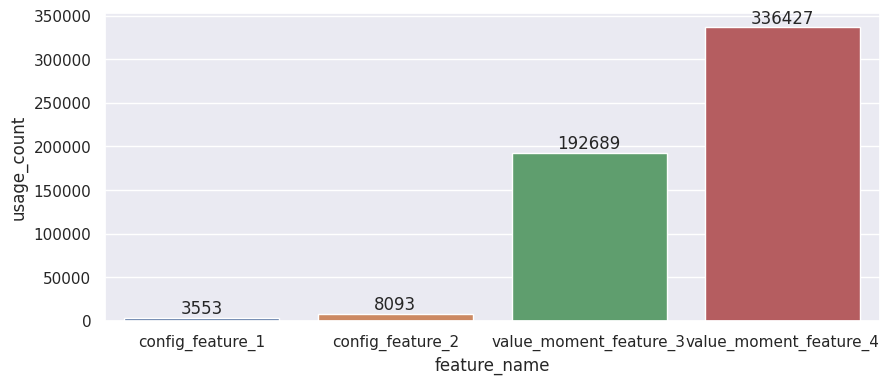

In [ ]:
#Creating graph of the feature usage data
sns.set(rc={'figure.figsize':(10,4)})

graph_df = pd.DataFrame(merged_df[['config_feature_1','config_feature_2','value_moment_feature_3','value_moment_feature_4']].sum()).reset_index().rename(columns = {'index':'feature_name',0:'usage_count'})

ax = sns.barplot(x='feature_name', y='usage_count', data=graph_df, errwidth=0)

for i in ax.containers:
    ax.bar_label(i,)


In [ ]:
# Getting year-wise used features
merged_df.groupby('first_customer_sign_year')[['config_feature_1','config_feature_2','value_moment_feature_3','value_moment_feature_4']].sum().reset_index()


,first_customer_sign_year,config_feature_1,config_feature_2,value_moment_feature_3,value_moment_feature_4
0,2013,0,0,0,0
1,2014,0,2,18,79
2,2015,31,258,3823,86319
3,2016,128,408,13426,21034
4,2017,512,1257,26794,43762
5,2018,307,661,37786,43909
6,2019,517,817,45232,78598
7,2020,294,1624,24129,33403
8,2021,964,2320,36141,26630
9,2022,800,746,5325,2667


# **END**